# 1. Setup and Data Loading

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Loading datasets
vendor_purchase_prices = pd.read_csv('Vendor_Purchase_Prices_Dec_2017.csv')
beginning_inventory = pd.read_csv('Beginning_Inventory_Dec_31_2016.csv')
ending_inventory = pd.read_csv('Ending_Inventory_Dec_31_2016.csv')
invoice_purchases = pd.read_csv('Invoice_Purchases_Dec_31_2016.csv')
purchases = pd.read_csv('Purchases_Dec_31_2016.csv')
sales = pd.read_csv('Sales_Dec_31_2016.csv')

In [55]:
print('vendor_purchase_prices columns:')
print(vendor_purchase_prices.columns.to_list())

print('\nbeginning_inventory columns:')
print(beginning_inventory.columns.to_list())

print('\nending_inventory columns:')
print(ending_inventory.columns.to_list())

print('\ninvoice_purchases columns:')
print(invoice_purchases.columns.to_list())

print('\npurchases columns:')
print(purchases.columns.to_list())

print('\nsales columns:')
print(sales.columns.to_list())

vendor_purchase_prices columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beginning_inventory columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

ending_inventory columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


# 2. Getting the overview of data using ChatGPT
Based on the provided datasets and their columns, Here is the summary of each dataset and the potential relationships between them:


## Datasets summary
### 1. **vendor_purchase_prices**
- **Columns:** ['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']
- **Summary:** This dataset appears to record the purchase prices from vendors, detailing the brand, product description, retail price, size, volume, classification of the product, purchase price, and identifying vendor information (number and name). This is used to track the cost of goods bought from different vendors.

### 2. **beginning_inventory**
- **Columns:** ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']
- **Summary:** Tracks the inventory status at the beginning of a specific period at different store locations. It includes details about the inventory items such as brand, description, size, quantity on hand, and price, tagged with a unique Inventory ID and the start date of the recording period.

### 3. **ending_inventory**
- **Columns:** ['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']
- **Summary:** Similar to beginning_inventory, this dataset tracks inventory status but at the end of a specific period. It helps in calculating inventory turnover and understanding sales performance.

### 4. **invoice_purchases**
- **Columns:** ['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']
- **Summary:** Records details of purchases made from vendors, including the vendor details, invoice dates, purchase order numbers and dates, payment dates, quantities purchased, total cost, freight charges, and approval status. This is used for financial and inventory management.

### 5. **purchases**
- **Columns:** ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']
- **Summary:** Detailed log of items purchased, the locations they were sent to, vendor information, purchase order details, prices, and quantities. This dataset is crucial for tracking inventory procurement and costs associated with acquisitions.

### 6. **sales**
- **Columns:** ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']
- **Summary:** Details sales transactions including what was sold, in what quantity, sales revenue, sales price, the date of sale, and relevant tax information. It also includes vendor details, which can be used for sales analysis and vendor performance.

## Relationships between Datasets:

1. **Vendor Information:** The 'VendorNumber' and 'VendorName' are shared across several datasets (vendor_purchase_prices, invoice_purchases, purchases, and sales), linking purchases and sales to specific vendors.

2. **Inventory Tracking:** 'InventoryId' is common between beginning_inventory, ending_inventory, purchases, and sales, which helps in tracking inventory flow from the beginning of a period to its end, through purchasing and sales.

3. **Product Information:** The 'Brand', 'Description', and 'Size' fields appear across multiple datasets (vendor_purchase_prices, beginning_inventory, ending_inventory, purchases, and sales), enabling consistency in identifying products throughout inventory and sales processes.

4. **Purchasing and Invoice Tracking:** The 'PONumber' and 'PODate' fields link invoice_purchases to purchases, helping in tracking the procurement process from order to invoice payment.

5. **Sales and Inventory Analysis:** The end-to-end inventory management can be analyzed by correlating beginning_inventory and ending_inventory with sales data to evaluate sales performance and stock management efficiency.

These relationships are key to integrating these datasets for comprehensive analysis in areas such as inventory management, financial accounting, procurement, and sales performance.

# Data Cleanning

In [56]:
# Function to check and report missing values
def check_missing_values(df, df_name):
    print(f'\nMissing values in {df_name}:')
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print('No missing values found.')
    else:
        print(missing_values)

datasets = {
    'Vendor_Purchase_Prices': vendor_purchase_prices, 
    'Beginning_Inventory': beginning_inventory, 
    'Ending_Inventory': ending_inventory, 
    'Invoice_Purchases': invoice_purchases, 
    'Purchases': purchases, 
    'Sales': sales
}

for name, dataset in datasets.items():
    check_missing_values(dataset, name)


Missing values in Vendor_Purchase_Prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in Beginning_Inventory:
No missing values found.

Missing values in Ending_Inventory:
City    1284
dtype: int64

Missing values in Invoice_Purchases:
Approval    5169
dtype: int64

Missing values in Purchases:
Size    3
dtype: int64

Missing values in Sales:
No missing values found.


In [57]:
# Use the store column to infer the city
missing_city = ending_inventory[ending_inventory['City'].isnull()]

missing_city_grouped = missing_city.groupby('Store').size().reset_index(name='Missing City Count')

missing_city_grouped_sorted = missing_city_grouped.sort_values('Missing City Count', ascending=False)

print('Grouped data by store for missing city values:')
print(missing_city_grouped_sorted)

Grouped data by store for missing city values:
   Store  Missing City Count
0     46                1284


In [58]:
# See what are the values for 'Approval' column
distinct_approval_value = invoice_purchases['Approval'].unique()

print('Distinct values in the Approval columns:')
print(distinct_approval_value)

Distinct values in the Approval columns:
[nan 'Frank Delahunt']


In [59]:
# Handing missing values

# Vendor_Purchase_Price
# Action summary: Removing rows with missing values in 'Description', 'Size', and 'Volume'
vendor_purchase_prices.dropna(subset=['Description', 'Size', 'Volume'], inplace=True)

# Ending_Inventory
# Action summary: Replacing missing 'City' with 'Unknown'
ending_inventory['City'].fillna('Unknown', inplace=True)

# Invoice_Purchases
# Action summary: Replacing missing 'Approval' with 'Unknown'
invoice_purchases['Approval'].fillna('Unknown', inplace = True)

# Purchases
# Action summary: Removing rows with missing values in 'Size'
purchases.dropna(subset=['Size'], inplace=True)

datasets = {
    'Vendor_Purchase_Prices': vendor_purchase_prices, 
    'Beginning_Inventory': beginning_inventory, 
    'Ending_Inventory': ending_inventory, 
    'Invoice_Purchases': invoice_purchases, 
    'Purchases': purchases, 
    'Sales': sales
}

for name, dataset in datasets.items():
    print(f'\nMissing values in {name} after handling')
    missing_values = dataset.isnull().sum()[dataset.isnull().sum() > 0 ]
    if missing_values.empty:
        print('No missing values.')
    else:
        print(missing_values)


Missing values in Vendor_Purchase_Prices after handling
No missing values.

Missing values in Beginning_Inventory after handling
No missing values.

Missing values in Ending_Inventory after handling
No missing values.

Missing values in Invoice_Purchases after handling
No missing values.

Missing values in Purchases after handling
No missing values.

Missing values in Sales after handling
No missing values.


# 4. Consolidating Datasets

In [60]:
# Summary statistics for numerical columns
beginning_inventory[['onHand', 'Price']].describe()

onHand          Price
count  206529.000000  206529.000000
mean       20.429455      22.253910
std        31.467342      70.178964
min         0.000000       0.000000
25%         7.000000       9.990000
50%        12.000000      14.990000
75%        21.000000      21.990000
max      1251.000000   13999.900000

In [61]:
# Summarize total purchases for each item
total_purchases = purchases.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity': 'TotalPurchased'}, inplace=True)
total_purchases

InventoryId  Store  Brand                   Description  \
0        10_HORNSEY_1001     10   1001          Bailey's 50mL 4 Pack   
1        10_HORNSEY_1003     10   1003  Crown Royal +2 Reusable Cups   
2       10_HORNSEY_10030     10  10030       Pacifico Sur Pnt Nr Rsv   
3        10_HORNSEY_1004     10   1004    Jim Beam w/2 Rocks Glasses   
4       10_HORNSEY_10057     10  10057  Rocca delle Macie Sasyr Tscn   
...                  ...    ...    ...                           ...   
245970  9_BLACKPOOL_9388      9   9388       Hennessy Privilege VSOP   
245971   9_BLACKPOOL_942      9    942      Glenmorangie Nectar D'Or   
245972   9_BLACKPOOL_966      9    966   Patron Citronge Orange Liqu   
245973   9_BLACKPOOL_984      9    984        Patron XO Cafe Liqueur   
245974   9_BLACKPOOL_999      9    999           Jameson 18 Year Old   

             Size  TotalPurchased  
0       50mL 4 Pk             120  
1           750mL             227  
2           750mL              13  
3           750mL              12  
4           750mL              12  
...           ...             ...  
245970      375mL              24  
245971      750mL               9  
245972      750mL              84  
245973      750mL              43  
245974      750mL               3  

[245975 rows x 6 columns]

In [62]:
# Summarize total sales for each item
total_sales = sales.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
total_sales.rename(columns={'SalesQuantity': 'TotalSold'}, inplace=True)
total_sales

InventoryId  Store  Brand                   Description  \
0        10_HORNSEY_1000     10   1000    Goslings Dark'n Stormy VAP   
1        10_HORNSEY_1001     10   1001          Bailey's 50mL 4 Pack   
2       10_HORNSEY_10030     10  10030       Pacifico Sur Pnt Nr Rsv   
3        10_HORNSEY_1005     10   1005       Maker's Mark Combo Pack   
4       10_HORNSEY_10057     10  10057  Rocca delle Macie Sasyr Tscn   
...                  ...    ...    ...                           ...   
170126  9_BLACKPOOL_9358      9   9358          KAH Reposado Tequila   
170127   9_BLACKPOOL_938      9    938  Jack Daniels Master Dist VAP   
170128  9_BLACKPOOL_9388      9   9388       Hennessy Privilege VSOP   
170129   9_BLACKPOOL_966      9    966   Patron Citronge Orange Liqu   
170130   9_BLACKPOOL_984      9    984        Patron XO Cafe Liqueur   

              Size  TotalSold  
0            750mL          1  
1        50mL 4 Pk         11  
2            750mL          2  
3       375mL 2 Pk          6  
4            750mL         12  
...            ...        ...  
170126       750mL          1  
170127       750mL          6  
170128       375mL          1  
170129       750mL          3  
170130       750mL          6  

[170131 rows x 6 columns]

In [63]:
total_purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size',
       'TotalPurchased'],
      dtype='object')

In [64]:
# Merge beginning and ending inventory
inventory = pd.merge(beginning_inventory, ending_inventory, 
                     on=['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size'], 
                     how='outer',
                     suffixes=('_beg', '_end'))

# Merge summarized purchases
inventory = pd.merge(inventory, total_purchases, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'], 
                     how='left')

# Merge summarized sales 
inventory = pd.merge(inventory, total_sales, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'], 
                     how='left')

inventory.head()

InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand_beg  Price_beg   startDate  onHand_end  Price_end  \
0  750mL         8.0      12.99  2016-01-01        11.0      12.99   
1  750mL         7.0      10.99  2016-01-01         NaN        NaN   
2  750mL         6.0      36.99  2016-01-01         7.0      36.99   
3  750mL         3.0      38.99  2016-01-01         7.0      38.99   
4  750mL         6.0      34.99  2016-01-01         4.0      34.99   

      endDate  TotalPurchased  TotalSold  
0  2016-12-31           105.0       11.0  
1         NaN            36.0        7.0  
2  2016-12-31           116.0       20.0  
3  2016-12-31            59.0        9.0  
4  2016-12-31             NaN        NaN

In [65]:
# Check for missing values
inventory.isna().sum()

InventoryId           0
Store                 0
City                  0
Brand                 0
Description           0
Size                  0
onHand_beg        52164
Price_beg         52164
startDate         52164
onHand_end        34204
Price_end         34204
endDate           34204
TotalPurchased    36976
TotalSold         92446
dtype: int64

In [66]:
# Fill NaN with 0 for 'TotalPurchases' and 'TotalSales'
inventory['TotalPurchased'].fillna(0, inplace=True)
inventory['TotalSold'].fillna(0, inplace=True)

In [67]:
# Calculate the total 'onHand' for the original beginning inventory
total_beg_inv_original = beginning_inventory['onHand'].sum()

# Calculate the total 'onHand_beg' for the merged dataframe
total_beg_inv_merged = inventory['onHand_beg'].sum()

# Calculate the total 'onHand' for the original ending inventory
total_end_inv_original = ending_inventory['onHand'].sum()

# Calculate the total 'onHand_end' for the merged dataframe
total_end_inv_merged = inventory['onHand_end'].sum()

In [68]:
# Comparison for the beginning inventory
print("the total 'onHand' for the original beginning inventory", total_beg_inv_original)
print("the total 'onHand_beg' for the merged dataframe", total_beg_inv_merged)

# Comparison for the ending inventory
print("\nthe total 'onHand' for the original ending inventory", total_end_inv_original)
print("the total 'onHand_end' for the merged dataframe", total_end_inv_merged)

the total 'onHand' for the original beginning inventory 4219275
the total 'onHand_beg' for the merged dataframe 4219275.0

the total 'onHand' for the original ending inventory 4885776
the total 'onHand_end' for the merged dataframe 4885776.0


In [69]:
# Calculate expected ending inventory
inventory['Expected_onHand_end'] = inventory['onHand_beg'] + inventory['TotalPurchased'] - inventory['TotalSold']

discrepancies = inventory[inventory['Expected_onHand_end'] != inventory['onHand_end']]

# If there are discrepencies, select the first one to inspect
if not discrepancies.empty:
    first_discrepancy = discrepancies.iloc[0]
    inventory_id = first_discrepancy['InventoryId']
    print(f'First item with the discrepancy {inventory_id}')
    print(first_discrepancy)
else:
    print('No discrepancies found between expected and ending inventory')

First item with the discrepancy 1_HARDERSFIELD_58
InventoryId                      1_HARDERSFIELD_58
Store                                            1
City                                  HARDERSFIELD
Brand                                           58
Description            Gekkeikan Black & Gold Sake
Size                                         750mL
onHand_beg                                     8.0
Price_beg                                    12.99
startDate                               2016-01-01
onHand_end                                    11.0
Price_end                                    12.99
endDate                                 2016-12-31
TotalPurchased                               105.0
TotalSold                                     11.0
Expected_onHand_end                          102.0
Name: 0, dtype: object


In [70]:
inventory_id

'1_HARDERSFIELD_58'

In [71]:
if not discrepancies.empty:
    # Filter and display item's details from each original dataset
    print('\nBeginning inventory records:')
    display(beginning_inventory[beginning_inventory['InventoryId'] == inventory_id])
    
    print('\nEnding inventory records:')
    display(ending_inventory[ending_inventory['InventoryId'] == inventory_id])
    
    print('\nPurchases Records:')
    display(purchases[purchases['InventoryId'] == inventory_id])
    
    print('\nSales Records')
    display(sales[sales['InventoryId'] == inventory_id])


Beginning inventory records:


InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   

    Size  onHand  Price   startDate  
0  750mL       8  12.99  2016-01-01


Ending inventory records:


InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   

    Size  onHand  Price     endDate  
0  750mL      11  12.99  2016-12-31


Purchases Records:


InventoryId  Store  Brand                  Description   Size  \
6575     1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
267751   1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
307840   1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
455767   1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
733550   1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
826935   1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1290622  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1341783  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1493888  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1593583  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1678675  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1775797  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1866690  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
1912047  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
2001252  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
2095068  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
2197059  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
2362168  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   

         VendorNumber                   VendorName  PONumber      PODate  \
6575             8320  SHAW ROSS INT L IMP LTD          8166  2015-12-23   
267751           8320  SHAW ROSS INT L IMP LTD          8835  2016-02-08   
307840           8320  SHAW ROSS INT L IMP LTD          8920  2016-02-14   
455767           8320  SHAW ROSS INT L IMP LTD          9353  2016-03-15   
733550           8320  SHAW ROSS INT L IMP LTD         10090  2016-05-05   
826935           8320  SHAW ROSS INT L IMP LTD         10234  2016-05-15   
1290622          8320  SHAW ROSS INT L IMP LTD         11292  2016-07-20   
1341783          8320  SHAW ROSS INT L IMP LTD         11336  2016-07-24   
1493888          8320  SHAW ROSS INT L IMP LTD         11698  2016-08-17   
1593583          8320  SHAW ROSS INT L IMP LTD         11895  2016-08-31   
1678675          8320  SHAW ROSS INT L IMP LTD         12072  2016-09-12   
1775797          8320  SHAW ROSS INT L IMP LTD         12364  2016-09-27   
1866690          8320  SHAW ROSS INT L IMP LTD         12582  2016-10-12   
1912047          8320  SHAW ROSS INT L IMP LTD         12628  2016-10-16   
2001252          8320  SHAW ROSS INT L IMP LTD         12870  2016-11-01   
2095068          8320  SHAW ROSS INT L IMP LTD         13096  2016-11-16   
2197059          8320  SHAW ROSS INT L IMP LTD         13249  2016-11-27   
2362168          8320  SHAW ROSS INT L IMP LTD         13584  2016-12-19   

        ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  \
6575       2016-01-01  2016-01-08  2016-02-11           9.28         6   
267751     2016-02-17  2016-02-27  2016-03-31           9.28         6   
307840     2016-02-26  2016-03-01  2016-04-15           9.28         6   
455767     2016-03-25  2016-04-04  2016-04-30           9.28         6   
733550     2016-05-12  2016-05-17  2016-07-03           9.28         5   
826935     2016-05-24  2016-05-30  2016-07-01           9.28         6   
1290622    2016-07-26  2016-08-01  2016-09-12           9.28         6   
1341783    2016-08-04  2016-08-15  2016-09-19           9.28         6   
1493888    2016-08-24  2016-09-01  2016-10-08           9.28         5   
1593583    2016-09-07  2016-09-20  2016-10-25           9.28         6   
1678675    2016-09-23  2016-10-02  2016-11-12           9.28         6   
1775797    2016-10-05  2016-10-12  2016-11-17           9.28         5   
1866690    2016-10-17  2016-10-30  2016-12-10           9.28         6   
1912047    20


Sales Records


InventoryId  Store  Brand                  Description   Size  \
14426   1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951497  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951498  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951499  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951500  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951501  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951502  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951503  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   
951504  1_HARDERSFIELD_58      1     58  Gekkeikan Black & Gold Sake  750mL   

        SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  \
14426               1         12.99       12.99   1/7/2016     750   
951497              2         25.98       12.99  2/10/2016     750   
951498              1         12.99       12.99  2/11/2016     750   
951499              1         12.99       12.99  2/13/2016     750   
951500              1         12.99       12.99  2/14/2016     750   
951501              1         12.99       12.99  2/16/2016     750   
951502              1         12.99       12.99  2/18/2016     750   
951503              2         25.98       12.99  2/20/2016     750   
951504              1         12.99       12.99  2/23/2016     750   

        Classification  ExciseTax  VendorNo                   VendorName  
14426                1       0.79      8320  SHAW ROSS INT L IMP LTD      
951497               1       1.57      8320  SHAW ROSS INT L IMP LTD      
951498               1       0.79      8320  SHAW ROSS INT L IMP LTD      
951499               1       0.79      8320  SHAW ROSS INT L IMP LTD      
951500               1       0.79      8320  SHAW ROSS INT L IMP LTD      
951501               1       0.79      8320  SHAW ROSS INT L IMP LTD      
951502               1       0.79      8320  SHAW ROSS INT L IMP LTD      
951503               1       1.57      8320  SHAW ROSS INT L IMP LTD      
951504               1       0.79      8320  SHAW ROSS INT L IMP LTD

In [72]:
# Inventory onHand from the beginning inventory records
initial_onHand = beginning_inventory[beginning_inventory['InventoryId'] == '1_HARDERSFIELD_58']['onHand'].sum()

# Total purchases
total_purchases = purchases[purchases['InventoryId'] == '1_HARDERSFIELD_58']['Quantity'].sum()

# Total sales
total_sales = sales[sales['InventoryId'] == '1_HARDERSFIELD_58']['SalesQuantity'].sum()

# Expected ending inventory
expected_ending_inventory =initial_onHand + total_purchases - total_sales

print(f'Initial on hand: {initial_onHand}')
print(f'Total purchases: {total_purchases}')
print(f'Total sales: {total_sales}')
print(f'\nExpected ending inventory: {expected_ending_inventory}')

# Comparing with reported ending inventory
reported_ending_inventory = ending_inventory[ending_inventory['InventoryId'] == '1_HARDERSFIELD_58']['onHand'].sum()
print(f'Reported ending inventory: {reported_ending_inventory}')

Initial on hand: 8
Total purchases: 105
Total sales: 11

Expected ending inventory: 102
Reported ending inventory: 11


In [73]:
print(inventory.columns.to_list())

['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand_beg', 'Price_beg', 'startDate', 'onHand_end', 'Price_end', 'endDate', 'TotalPurchased', 'TotalSold', 'Expected_onHand_end']


# 5. Exploratory Data Analysis

In [74]:
inventory.head()

InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand_beg  Price_beg   startDate  onHand_end  Price_end  \
0  750mL         8.0      12.99  2016-01-01        11.0      12.99   
1  750mL         7.0      10.99  2016-01-01         NaN        NaN   
2  750mL         6.0      36.99  2016-01-01         7.0      36.99   
3  750mL         3.0      38.99  2016-01-01         7.0      38.99   
4  750mL         6.0      34.99  2016-01-01         4.0      34.99   

      endDate  TotalPurchased  TotalSold  Expected_onHand_end  
0  2016-12-31           105.0       11.0                102.0  
1         NaN            36.0        7.0                 36.0  
2  2016-12-31           116.0       20.0                102.0  
3  2016-12-31            59.0        9.0                 53.0  
4  2016-12-31             0.0        0.0                  6.0

In [75]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258693 entries, 0 to 258692
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InventoryId          258693 non-null  object 
 1   Store                258693 non-null  int64  
 2   City                 258693 non-null  object 
 3   Brand                258693 non-null  int64  
 4   Description          258693 non-null  object 
 5   Size                 258693 non-null  object 
 6   onHand_beg           206529 non-null  float64
 7   Price_beg            206529 non-null  float64
 8   startDate            206529 non-null  object 
 9   onHand_end           224489 non-null  float64
 10  Price_end            224489 non-null  float64
 11  endDate              224489 non-null  object 
 12  TotalPurchased       258693 non-null  float64
 13  TotalSold            258693 non-null  float64
 14  Expected_onHand_end  206529 non-null  float64
dtypes: float64(7), in

In [76]:
inventory.describe()

Store          Brand     onHand_beg      Price_beg  \
count  258693.000000  258693.000000  206529.000000  206529.000000   
mean       43.398449   14115.134677      20.429455      22.253910   
std        23.293805   13017.666302      31.467342      70.178964   
min         1.000000      58.000000       0.000000       0.000000   
25%        23.000000    3727.000000       7.000000       9.990000   
50%        45.000000    8187.000000      12.000000      14.990000   
75%        66.000000   23383.000000      21.000000      21.990000   
max        81.000000   90631.000000    1251.000000   13999.900000   

          onHand_end      Price_end  TotalPurchased      TotalSold  \
count  224489.000000  224489.000000   258693.000000  258693.000000   
mean       21.763988      23.585583      125.075951       9.321180   
std        37.233576      79.202775      317.131292      26.821291   
min         0.000000       0.490000        0.000000       0.000000   
25%         7.000000       9.990000       12.000000       0.000000   
50%        12.000000      14.990000       39.000000       2.000000   
75%        22.000000      23.490000      120.000000       8.000000   
max      3676.000000   13999.900000    12705.000000    1142.000000   

       Expected_onHand_end  
count        206529.000000  
mean            151.658886  
std             341.278979  
min               0.000000  
25%              24.000000  
50%              60.000000  
75%             149.000000  
max           12944.000000

In [77]:
inventory.isna().sum()

InventoryId                0
Store                      0
City                       0
Brand                      0
Description                0
Size                       0
onHand_beg             52164
Price_beg              52164
startDate              52164
onHand_end             34204
Price_end              34204
endDate                34204
TotalPurchased             0
TotalSold                  0
Expected_onHand_end    52164
dtype: int64

In [78]:
columns_with_nulls = ['onHand_beg', 'Price_beg', 'startDate', 'onHand_end', 'Price_end', 'endDate', 'Expected_onHand_end']

rows_with_nulls = inventory[inventory[columns_with_nulls].isnull().any(axis=1)]

rows_with_nulls.head(10)

InventoryId  Store          City  Brand  \
1    1_HARDERSFIELD_60      1  HARDERSFIELD     60   
9   1_HARDERSFIELD_120      1  HARDERSFIELD    120   
11  1_HARDERSFIELD_165      1  HARDERSFIELD    165   
14  1_HARDERSFIELD_178      1  HARDERSFIELD    178   
18  1_HARDERSFIELD_247      1  HARDERSFIELD    247   
22  1_HARDERSFIELD_281      1  HARDERSFIELD    281   
23  1_HARDERSFIELD_283      1  HARDERSFIELD    283   
27  1_HARDERSFIELD_311      1  HARDERSFIELD    311   
28  1_HARDERSFIELD_323      1  HARDERSFIELD    323   
30  1_HARDERSFIELD_356      1  HARDERSFIELD    356   

                     Description   Size  onHand_beg  Price_beg   startDate  \
1         Canadian Club 1858 VAP  750mL         7.0      10.99  2016-01-01   
9    Tarantula Azul Tequila Gift  750mL        11.0      13.99  2016-01-01   
11      Gentleman Jack Gift Pack  750mL         0.0      26.99  2016-01-01   
14     Wild Turkey Russell's RSV  750mL        24.0      26.99  2016-01-01   
18   Gran Patron Platinum Tequil  750mL         1.0     199.99  2016-01-01   
22       Kamora Coffee Gift Pack  750mL         1.0       9.99  2016-01-01   
23  Milagro Tequila Reposado SBR  750mL         4.0      57.99  2016-01-01   
27   The Glenlivet 12 Yr Gift Pk  750mL         8.0      41.99  2016-01-01   
28  Tequila Rose Strawberry Gift  750mL         6.0      13.99  2016-01-01   
30    Carolans Irish Cr Gift Set  750mL         0.0      11.49  2016-01-01   

    onHand_end  Price_end endDate  TotalPurchased  TotalSold  \
1          NaN        NaN     NaN            36.0        7.0   
9          NaN        NaN     NaN             0.0        5.0   
11         NaN        NaN     NaN            24.0        0.0   
14         NaN        NaN     NaN            12.0        4.0   
18         NaN        NaN     NaN             0.0        0.0   
22         NaN        NaN     NaN            18.0        1.0   
23         NaN        NaN     NaN             0.0        2.0   
27         NaN        NaN     NaN            24.0        6.0   
28         NaN        NaN     NaN            18.0        3.0   
30         NaN        NaN     NaN             0.0        0.0   

    Expected_onHand_end  
1                  36.0  
9                   6.0  
11                 24.0  
14                 32.0  
18                  1.0  
22                 18.0  
23                  2.0  
27                 26.0  
28                 21.0  
30                  0.0

In [79]:
# Filter the rows for 'onHand_end' equal to 'Expected_onHand_end'
matching_rows = inventory[inventory['onHand_end'] == inventory['Expected_onHand_end']]

matching_rows.head(10)

InventoryId  Store          City  Brand  \
41    1_HARDERSFIELD_425      1  HARDERSFIELD    425   
79    1_HARDERSFIELD_780      1  HARDERSFIELD    780   
101   1_HARDERSFIELD_883      1  HARDERSFIELD    883   
109   1_HARDERSFIELD_950      1  HARDERSFIELD    950   
116  1_HARDERSFIELD_1001      1  HARDERSFIELD   1001   
147  1_HARDERSFIELD_1106      1  HARDERSFIELD   1106   
175  1_HARDERSFIELD_1274      1  HARDERSFIELD   1274   
297  1_HARDERSFIELD_2029      1  HARDERSFIELD   2029   
351  1_HARDERSFIELD_2182      1  HARDERSFIELD   2182   
354  1_HARDERSFIELD_2186      1  HARDERSFIELD   2186   

                      Description       Size  onHand_beg  Price_beg  \
41               Hennessy Paradis      750mL         1.0     799.99   
79        Svedka Clementine Vodka      Liter        14.0      12.99   
101  Patron Burdeos Anejo Tequila      750mL         2.0     499.99   
109      Mastersons 10 Yr Old Rye      750mL         2.0      79.99   
116           Baileys 50mL 4 Pack  50mL 4 Pk         0.0       5.99   
147         Aberfeldy Single Cask      750mL         8.0     229.99   
175                No. 14 Bourbon      750mL         0.0      44.99   
297       Springbank 10 Yr Scotch      750mL         8.0      73.99   
351   McClelland Islay Single Mal      750mL         0.0      18.99   
354          Label 5 Scotch 12 Yr      750mL         8.0      31.99   

      startDate  onHand_end  Price_end     endDate  TotalPurchased  TotalSold  \
41   2016-01-01         1.0     799.99  2016-12-31             0.0        0.0   
79   2016-01-01        13.0      12.99  2016-12-31             0.0        1.0   
101  2016-01-01         2.0     499.99  2016-12-31             0.0        0.0   
109  2016-01-01         1.0      79.99  2016-12-31             0.0        1.0   
116  2016-01-01         0.0       5.99  2016-12-31             0.0        0.0   
147  2016-01-01         8.0     249.99  2016-12-31             0.0        0.0   
175  2016-01-01         0.0      44.99  2016-12-31             0.0        0.0   
297  2016-01-01        11.0      73.99  2016-12-31             6.0        3.0   
351  2016-01-01        12.0      19.99  2016-12-31            12.0        0.0   
354  2016-01-01         7.0      31.99  2016-12-31             0.0        1.0   

     Expected_onHand_end  
41                   1.0  
79                  13.0  
101                  2.0  
109                  1.0  
116                  0.0  
147                  8.0  
175                  0.0  
297                 11.0  
351                 12.0  
354                  7.0

# 6. Discrepancy Analysis

In [80]:
inventory['Discrepancy'] = inventory['Expected_onHand_end'] - inventory['onHand_end']
inventory['Discrepancy'].describe()

count    172325.000000
mean        152.488664
std         341.055875
min        -269.000000
25%          23.000000
50%          61.000000
75%         149.000000
max       12170.000000
Name: Discrepancy, dtype: float64

In [81]:
# Calculate price for calculation and descrepancy value
inventory['Price_for_Calculation'] = inventory['Price_end'].fillna(inventory['Price_beg'])
inventory['Discrepancy'] = pd.to_numeric(inventory['Discrepancy'], errors='coerce')
inventory['Discrepancy_Value'] = inventory['Discrepancy'] * inventory['Price_for_Calculation']

# Format the descripancy value
inventory['Discrepancy_Value_Dollars'] = inventory['Discrepancy_Value'].apply(lambda x :"${:,.2f}".format(x))

inventory.head()

InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand_beg  Price_beg   startDate  onHand_end  Price_end  \
0  750mL         8.0      12.99  2016-01-01        11.0      12.99   
1  750mL         7.0      10.99  2016-01-01         NaN        NaN   
2  750mL         6.0      36.99  2016-01-01         7.0      36.99   
3  750mL         3.0      38.99  2016-01-01         7.0      38.99   
4  750mL         6.0      34.99  2016-01-01         4.0      34.99   

      endDate  TotalPurchased  TotalSold  Expected_onHand_end  Discrepancy  \
0  2016-12-31           105.0       11.0                102.0         91.0   
1         NaN            36.0        7.0                 36.0          NaN   
2  2016-12-31           116.0       20.0                102.0         95.0   
3  2016-12-31            59.0        9.0                 53.0         46.0   
4  2016-12-31             0.0        0.0                  6.0          2.0   

   Price_for_Calculation  Discrepancy_Value Discrepancy_Value_Dollars  
0                  12.99            1182.09                 $1,182.09  
1                  10.99                NaN                      $nan  
2                  36.99            3514.05                 $3,514.05  
3                  38.99            1793.54                 $1,793.54  
4                  34.99              69.98                    $69.98

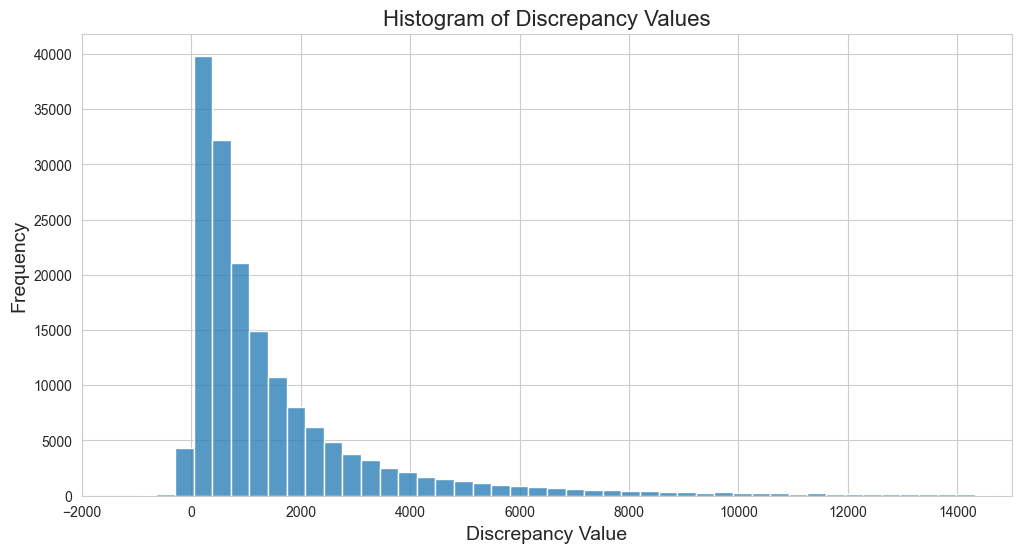

In [82]:
central_range = (-2000, 15000)

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(inventory['Discrepancy_Value'], bins=50, kde=False, binrange=central_range)

plt.title('Histogram of Discrepancy Values', fontsize=16)
plt.xlabel('Discrepancy Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(central_range)

plt.show()

In [83]:
import plotly.graph_objs as go

# Set up the figure
fig = go.Figure()

# Add the histogram trace
fig.add_trace(go.Histogram(
    x=inventory['Discrepancy_Value'],
    xbins=dict( # bins settings
        start=-2000,
        end=15000,
        size=(15000 - (-2000)) / 50
    ),
    marker_color='#636EFA' # This is the color for the bars, you can adjust it as needed
))

# Update the layout
fig.update_layout(
    title_text='Histogram of Discrepancy Values', # title of plot
    xaxis_title_text='Discrepancy Value', # xaxis label
    yaxis_title_text='Frequency', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.0, # gap between bars of the same location coordinate
    template='plotly_white',
    xaxis=dict(
        range=[-2000, 15000] # set the range of the xaxis
    )
)

fig.show()

In [84]:
# Identify the top 5 products with positive discrepancy value
top_positive_discrepancies = inventory[inventory['Discrepancy_Value'] > 0].sort_values(by='Discrepancy_Value', ascending=False).head(5)
positive_detailed_view = top_positive_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City', 'Discrepancy', 'Discrepancy_Value_Dollars']]

positive_detailed_view

InventoryId              Description  Store  Brand       City  \
118538  50_MOUNTMEND_1233  Jack Daniels No 7 Black     50   1233  MOUNTMEND   
195379  76_DONCASTER_3405    Tito's Handmade Vodka     76   3405  DONCASTER   
120118  50_MOUNTMEND_8068         Absolut 80 Proof     50   8068  MOUNTMEND   
79283   34_PITMERDEN_3545          Ketel One Vodka     34   3545  PITMERDEN   
195432  76_DONCASTER_3545          Ketel One Vodka     76   3545  DONCASTER   

        Discrepancy Discrepancy_Value_Dollars  
118538       8428.0               $294,895.72  
195379       9542.0               $276,622.58  
120118       9285.0               $218,104.65  
79283        7119.0               $213,498.81  
195432       7100.0               $212,929.00

In [85]:
# Identify the top 5 products with negative discrepancy value
top_negative_discrepancies = inventory[inventory['Discrepancy_Value'] < 0].sort_values(by='Discrepancy_Value').head(5)
negative_detailed_view = top_negative_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City', 'Discrepancy', 'Discrepancy_Value_Dollars']]

negative_detailed_view

InventoryId                 Description  Store  Brand  \
168049  67_EANVERNESS_35464   Stags Leap WC Artemis Cab     67  35464   
162888  66_EANVERNESS_35464   Stags Leap WC Artemis Cab     66  35464   
118742    50_MOUNTMEND_2209          Pendleton 1910 Rye     50   2209   
192217  74_PAENTMARWY_35464   Stags Leap WC Artemis Cab     74  35464   
79560     34_PITMERDEN_4225  Goslings Black Seal Rum 80     34   4225   

              City  Discrepancy Discrepancy_Value_Dollars  
168049  EANVERNESS       -125.0                $-6,123.75  
162888  EANVERNESS        -90.0                $-4,409.10  
118742   MOUNTMEND       -222.0                $-3,993.78  
192217  PAENTMARWY        -72.0                $-3,527.28  
79560    PITMERDEN       -128.0                $-3,326.72

Our discrepancy analysis has provided valuable insights into inventory accuracy and potential operational inefficiencies. For the top 5 products with a positive discrepancy, where actual inventory is less than expected, it's crucial to investigate discrepancies that may indicate unrecorded sales, stock losses, or other issues affecting inventory accuracy. Immediate actions should include reviewing sales recording practices, assessing theft or loss, and evaluating demand forecasting accuracy. Conversely, the top 5 products with a negative discrepancy, where actual inventory exceeds expectations, suggest potential overstocking or underreporting of sales. For these items, we recommend analyzing purchasing practices, reassessing demand forecasting, and improving inventory tracking systems. By addressing these discrepancies, the company can improve inventory accuracy, enhance financial reporting, and optimize stock levels, leading to better operational efficiency and customer satisfaction.

# 7. Recommmended Inventory Level

In [86]:
# Calculate the total sales volume for each product
sales_volume = inventory.groupby(['InventoryId', 'Description'])['TotalSold'].sum()

# Sort product based on sales volume and select top 20
top_20_critical = sales_volume.sort_values(ascending=False).head(20)
top_20_critical

InventoryId          Description                 
1_HARDERSFIELD_8111  Smirnoff 80 Proof               1142.0
10_HORNSEY_8111      Smirnoff 80 Proof               1104.0
34_PITMERDEN_4261    Capt Morgan Spiced Rum          1055.0
53_HILLFAR_8111      Smirnoff 80 Proof                939.0
10_HORNSEY_4157      Smirnoff Green Apple Vodka       927.0
10_HORNSEY_1892      Yukon Jack                       921.0
27_MOUNTMEND_8111    Smirnoff 80 Proof                909.0
10_HORNSEY_5491      Rumpleminze                      905.0
14_BROMWICH_1892     Yukon Jack                       854.0
14_BROMWICH_4261     Capt Morgan Spiced Rum           850.0
34_PITMERDEN_3545    Ketel One Vodka                  843.0
10_HORNSEY_4261      Capt Morgan Spiced Rum           836.0
10_HORNSEY_3606      Smirnoff Raspberry Vodka         821.0
34_PITMERDEN_8111    Smirnoff 80 Proof                812.0
77_TAMWORTH_5111     Dr McGillicuddy's Mentholmnt     811.0
15_WANBORNE_8068     Absolut 80 Proof             

In [87]:
# Extract the inventory IDs for the top 20 products
top_20_inventory_ids = top_20_critical.index.get_level_values('InventoryId').tolist()
top_20_inventory_ids

['1_HARDERSFIELD_8111',
 '10_HORNSEY_8111',
 '34_PITMERDEN_4261',
 '53_HILLFAR_8111',
 '10_HORNSEY_4157',
 '10_HORNSEY_1892',
 '27_MOUNTMEND_8111',
 '10_HORNSEY_5491',
 '14_BROMWICH_1892',
 '14_BROMWICH_4261',
 '34_PITMERDEN_3545',
 '10_HORNSEY_4261',
 '10_HORNSEY_3606',
 '34_PITMERDEN_8111',
 '77_TAMWORTH_5111',
 '15_WANBORNE_8068',
 '27_MOUNTMEND_1892',
 '10_HORNSEY_8053',
 '1_HARDERSFIELD_3609',
 '10_HORNSEY_4135']

In [88]:
# Converts 'PODate' and 'ReceivingDate' to datetime objects
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Convert 'SalesDate' to datetime objects
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

In [89]:
# Retriving the first InventoryId from the top 20 list
first_inventory_id = top_20_inventory_ids[0]
print('Investigating InventoryId:', first_inventory_id)

# Beginning and ending inventory
beginning_inventory = inventory[inventory['InventoryId'] == first_inventory_id]['onHand_beg'].sum()
ending_inventory = inventory[inventory['InventoryId'] == first_inventory_id]['onHand_end'].sum()

# Total sales
total_sales = sales[sales['InventoryId'] == first_inventory_id]['SalesQuantity'].sum()

# Total purchases
total_purchases = purchases[purchases['InventoryId'] == first_inventory_id]['Quantity'].sum()

print(f'Beginning inventory for {first_inventory_id}: {beginning_inventory}')
print(f'Ending inventory for {first_inventory_id}: {ending_inventory}')
print(f'Total sales for {first_inventory_id}: {total_sales}')
print(f'Total purchases for {first_inventory_id}: {total_purchases}')

Investigating InventoryId: 1_HARDERSFIELD_8111
Beginning inventory for 1_HARDERSFIELD_8111: 58.0
Ending inventory for 1_HARDERSFIELD_8111: 417.0
Total sales for 1_HARDERSFIELD_8111: 1142
Total purchases for 1_HARDERSFIELD_8111: 6522


In [90]:
# Calculate the total sales period for each product
total_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days

# Calculate the average daily sales for top 20 products
ads = sales[sales['InventoryId'].isin(top_20_inventory_ids)].groupby('InventoryId')['SalesQuantity'].sum() / total_days
ads

InventoryId
10_HORNSEY_1892        15.610169
10_HORNSEY_3606        13.915254
10_HORNSEY_4135        12.932203
10_HORNSEY_4157        15.711864
10_HORNSEY_4261        14.169492
10_HORNSEY_5491        15.338983
10_HORNSEY_8053        13.288136
10_HORNSEY_8111        18.711864
14_BROMWICH_1892       14.474576
14_BROMWICH_4261       14.406780
15_WANBORNE_8068       13.728814
1_HARDERSFIELD_3609    13.169492
1_HARDERSFIELD_8111    19.355932
27_MOUNTMEND_1892      13.491525
27_MOUNTMEND_8111      15.406780
34_PITMERDEN_3545      14.288136
34_PITMERDEN_4261      17.881356
34_PITMERDEN_8111      13.762712
53_HILLFAR_8111        15.915254
77_TAMWORTH_5111       13.745763
Name: SalesQuantity, dtype: float64

In [91]:
# Calculate lead time for each purchases
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Calculate lead time for the top 20 products
average_lt = purchases[purchases['InventoryId'].isin(top_20_inventory_ids)].groupby('InventoryId')['LeadTime'].mean()
average_lt

InventoryId
10_HORNSEY_1892        8.105263
10_HORNSEY_3606        8.258621
10_HORNSEY_4135        7.900000
10_HORNSEY_4157        7.963636
10_HORNSEY_4261        7.676190
10_HORNSEY_5491        7.939394
10_HORNSEY_8053        8.152778
10_HORNSEY_8111        7.961538
14_BROMWICH_1892       6.492063
14_BROMWICH_4261       6.612903
15_WANBORNE_8068       7.339623
1_HARDERSFIELD_3609    7.869565
1_HARDERSFIELD_8111    8.317460
27_MOUNTMEND_1892      7.658228
27_MOUNTMEND_8111      7.597938
34_PITMERDEN_3545      6.971154
34_PITMERDEN_4261      6.990909
34_PITMERDEN_8111      7.275510
53_HILLFAR_8111        7.656863
77_TAMWORTH_5111       7.629213
Name: LeadTime, dtype: float64

In [92]:
# Verify data availibility for the top 20 products
ads.index == average_lt.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [93]:
# Disable
import warnings
warnings.filterwarnings('ignore')

In [94]:
# Create dataframe for store the results
recommended_stock_level = pd.DataFrame(columns=['InventoryId', 'Reorder Point'])
recommended_stock_level

Empty DataFrame
Columns: [InventoryId, Reorder Point]
Index: []

In [95]:
print(type(recommended_stock_level))

<class 'pandas.core.frame.DataFrame'>


In [96]:
# Calculate the Reorder Point (ROP) without safety stock for the top 20 products
for inventory_id in top_20_inventory_ids:
    product_ads = ads.loc[inventory_id] if inventory_id in ads.index else 0 
    product_lt = average_lt.loc[inventory_id] if inventory_id in average_lt.index else 0 
    
    product_rop = product_ads * product_lt
    
    recommended_stock_level = recommended_stock_level._append({
        'InventoryId': inventory_id, 
        'Reorder Point': product_rop
    }, ignore_index=True)

print(recommended_stock_level)

            InventoryId  Reorder Point
0   1_HARDERSFIELD_8111     160.992198
1       10_HORNSEY_8111     148.975228
2     34_PITMERDEN_4261     125.006934
3       53_HILLFAR_8111     121.860917
4       10_HORNSEY_4157     125.123575
5       10_HORNSEY_1892     126.524532
6     27_MOUNTMEND_8111     117.059759
7       10_HORNSEY_5491     121.782229
8      14_BROMWICH_1892      93.969868
9      14_BROMWICH_4261      95.270640
10    34_PITMERDEN_3545      99.604791
11      10_HORNSEY_4261     108.767716
12      10_HORNSEY_3606     114.920807
13    34_PITMERDEN_8111     100.130751
14     77_TAMWORTH_5111     104.869358
15     15_WANBORNE_8068     100.764311
16    27_MOUNTMEND_1892     103.321176
17      10_HORNSEY_8053     108.335217
18  1_HARDERSFIELD_3609     103.638172
19      10_HORNSEY_4135     102.164407


In [97]:
# Merge the recommended order point with the actual ending inventory from inventory dataframe
comparison = recommended_stock_level.merge(inventory[['InventoryId', 'onHand_end']], on='InventoryId', how='left')

# Calculate the difference between the reorder point and the actual ending inventory
comparison['Difference'] = comparison['onHand_end'] - comparison['Reorder Point']

comparison[['InventoryId', 'Reorder Point', 'onHand_end', 'Difference']]

InventoryId  Reorder Point  onHand_end  Difference
0   1_HARDERSFIELD_8111     160.992198       417.0  256.007802
1       10_HORNSEY_8111     148.975228       424.0  275.024772
2     34_PITMERDEN_4261     125.006934       612.0  486.993066
3       53_HILLFAR_8111     121.860917      1066.0  944.139083
4       10_HORNSEY_4157     125.123575       212.0   86.876425
5       10_HORNSEY_1892     126.524532       110.0  -16.524532
6     27_MOUNTMEND_8111     117.059759       269.0  151.940241
7       10_HORNSEY_5491     121.782229       296.0  174.217771
8      14_BROMWICH_1892      93.969868       283.0  189.030132
9      14_BROMWICH_4261      95.270640        71.0  -24.270640
10    34_PITMERDEN_3545      99.604791       853.0  753.395209
11      10_HORNSEY_4261     108.767716       223.0  114.232284
12      10_HORNSEY_3606     114.920807       141.0   26.079193
13    34_PITMERDEN_8111     100.130751       133.0   32.869249
14     77_TAMWORTH_5111     104.869358       339.0  234.130642
15     15_WANBORNE_8068     100.764311       199.0   98.235689
16    27_MOUNTMEND_1892     103.321176       247.0  143.678824
17      10_HORNSEY_8053     108.335217        96.0  -12.335217
18  1_HARDERSFIELD_3609     103.638172       378.0  274.361828
19      10_HORNSEY_4135     102.164407       191.0   88.835593

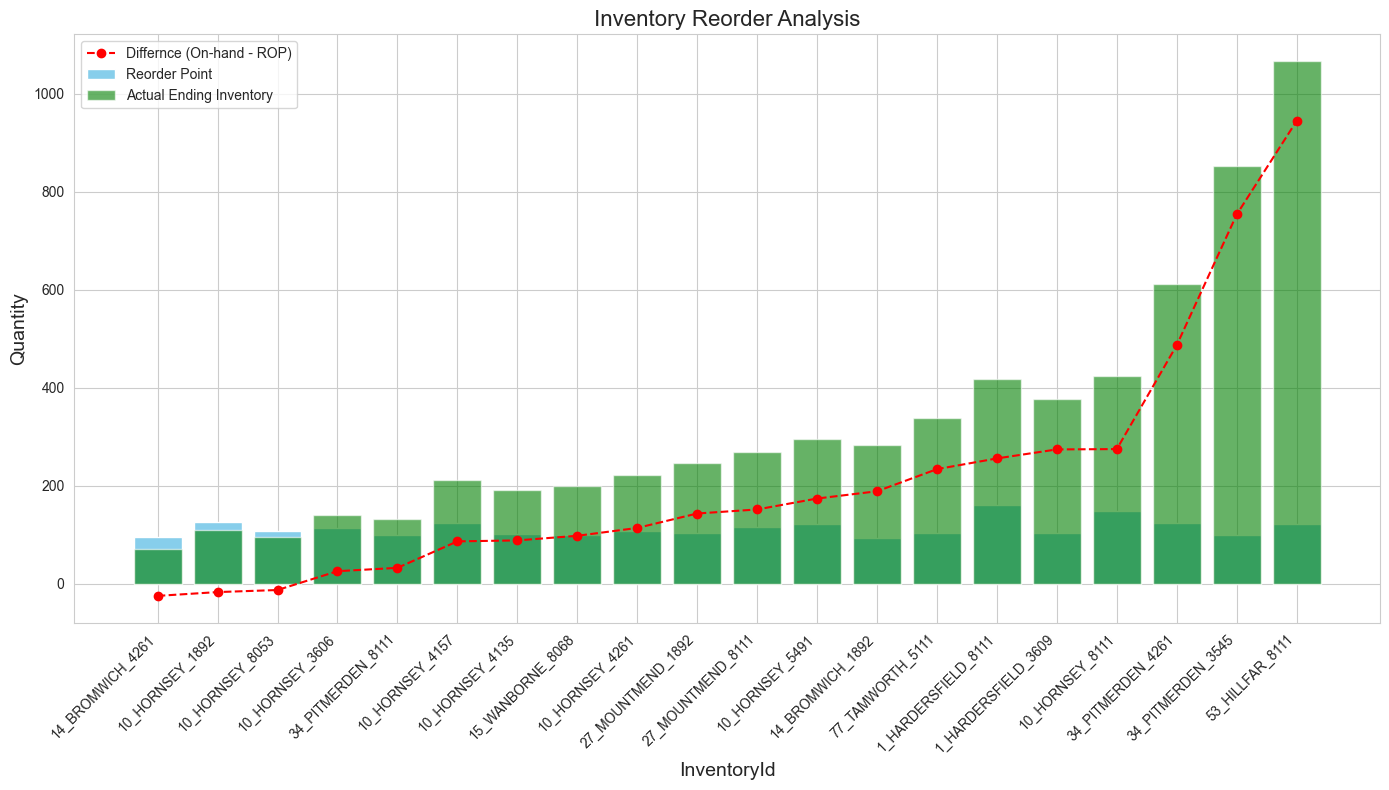

In [98]:
comparison_sorted = comparison.sort_values('Difference')

plt.figure(figsize=(14, 8))

# Reorder point
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['Reorder Point'], color='skyblue', label='Reorder Point')

# Actual ending inventory
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['onHand_end'], color='green', alpha=0.6, label='Actual Ending Inventory')

# Overlay Difference with line graph
plt.plot(comparison_sorted['InventoryId'], comparison_sorted['Difference'], color='red', marker='o', linestyle='dashed', label='Differnce (On-hand - ROP)')

plt.title('Inventory Reorder Analysis', fontsize=16)
plt.xlabel('InventoryId', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
# Convert 'SalesDate' and 'ReceivingDate' to datetime format
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Calculate total sales days for ADS calculation (assuming a year of sales data)
total_sales_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days
total_sales_days

59

In [100]:
# Assumming a holding cost as a percentage of the unit cost(e.g., 25%)
holding_cost_percentage = 0.25

# Estimated order cost ($)
order_cost_per_order = 50

In [101]:
# Identify the products from the top 20 that have actual ending inventory lower than the reorder point
products_to_reorder = comparison[comparison['Difference'] < 0]

# Filter the sales and purchases data for the top 20 products requiring reorder
sales_top20 = sales[sales['InventoryId'].isin(products_to_reorder['InventoryId'])]
purchases_top20 = purchases[purchases['InventoryId'].isin(products_to_reorder['InventoryId'])]

# Calculate the average unit cost and annual demand for theses products
average_unit_cost = purchases_top20.groupby('InventoryId')['PurchasePrice'].mean()
annual_demand = sales_top20.groupby('InventoryId')['SalesQuantity'].sum()

# Calculate holding cost per unit
holding_cost_per_unit = average_unit_cost * holding_cost_percentage

In [102]:
# Function to calculate EOQ
def calculated_eoq(demand, order_cost, holding_cost):
    if demand > 0 and holding_cost > 0:
        return np.sqrt(2 * demand * order_cost / holding_cost)
    else:
        return 0 

In [103]:
# Calculate EOQ for the top 20 products requiring reorder
eoq_values = {}
for inventory_id in products_to_reorder['InventoryId']:
    demand = annual_demand.get(inventory_id, 0)
    holding_cost = holding_cost_per_unit.get(inventory_id, 0)
    eoq = calculated_eoq(demand, order_cost_per_order, holding_cost)
    eoq_values[inventory_id] = eoq
    
eoq_values

{'10_HORNSEY_1892': 715.3087911291645,
 '14_BROMWICH_4261': 145.00549112072923,
 '10_HORNSEY_8053': 646.6323014923809}

In [104]:
# Convert eoq_values to dataframe
eoq_df = pd.DataFrame(list(eoq_values.items()), columns=['InventoryId', 'EOQ'])
eoq_df         

InventoryId         EOQ
0   10_HORNSEY_1892  715.308791
1  14_BROMWICH_4261  145.005491
2   10_HORNSEY_8053  646.632301